We saw that a periodic function, $f(t)$, can be written as a Fourier series,
$$f(t) = \frac{1}{2}a_0 + \displaystyle \sum_{n=0}^{\infty}(a_n \cos n\omega_0 t + \sin n\omega_0 t)$$

where $\omega_0$ is the fundamental angular frequency given by

$$\omega_0 = \frac{2\pi}{T}$$

This series can also be based on the spatial coordinate $x$ so that on the interval $0 \le x \le L$

$$f(x) = \displaystyle \sum_{n=0}^{\infty} a_n \cos \left( \frac{2\pi nx}{L} \right) + \sum_{n=1}^{\infty}b_n \sin \left(\frac{2\pi nx}{L} \right)$$

An alternative way to represent the series is to make use of the identities

\begin{align*}
\sin \theta &= \frac{1}{2}(e^{-i\theta} + e^{i\theta}) \\
\cos \theta &= \frac{1}{2}i(e^{-i\theta} - e^{i\theta})
\end{align*}

such that

\begin{align*}
f(x) &= \frac{1}{2} \displaystyle \sum_{n=0}^{\infty} a_n \left[ \exp \left(-i \frac{2\pi nx}{L} \right) + \exp \left(i \frac{2\pi nx}{L} \right)\right] 
+ \frac{i}{2} \displaystyle \sum_{n=0}^{\infty} b_n \left[ \exp \left(-i \frac{2\pi nx}{L} \right) - \exp \left(i \frac{2\pi nx}{L} \right)\right] \\

&= \frac{1}{2} \displaystyle \sum_{n=0}^{\infty} a_n \left[ \exp \left(i \frac{2\pi (-n)x}{L} \right) + \exp \left(i \frac{2\pi nx}{L} \right)\right] 
+ \frac{i}{2} \displaystyle \sum_{n=0}^{\infty} b_n \left[ \exp \left(i \frac{2\pi (-n)x}{L} \right) - \exp \left(i \frac{2\pi nx}{L} \right)\right] \\

&= \frac{1}{2} \displaystyle \sum_{n=-\infty}^{-1} (a_n + ib_n) \exp \left(i \frac{2\pi nx}{L} \right) + a_0 + \frac{1}{2} \displaystyle \sum_{n=1}^{\infty} (a_n - ib_n) \exp \left(i \frac{2\pi nx}{L} \right) \\

&= \displaystyle \sum_{n=-\infty}^{\infty} \gamma_n \exp \left(i\frac{2\pi nx}{L} \right)
\end{align*}

where $\gamma_n = \frac{1}{2}(a_n + ib_n)$ if $n<0$, $\gamma_0 = a_0$, and $\gamma_n = \frac{1}{2}(a_n - ib_n)$ if $n>0$.

- Note that the Fourier Series can be used only for periodic functions, meaning that the function in the interval from $0$ to $L$ is repeated over and over again.
- Most functions that we deal with are not periodic. Does this mean that Fourier series cannot be used? No, it does not. If we are interested in a portion of a nonperiodic function over a finite interval, then we can take just that portion and just repeat it to create a periodic function. Just recognize that outside of the interval the Fourier series will give the incorrect answer.
- Using Fourier's trick we can evaluate $\gamma_n$, i.e., multiply $f(x)$ by the orthogonal function $\exp(-i2\pi nx/L)$ and integrate over the interval $0<x<L$

$$\int_0^L f(x) \exp \left(-i \frac{2\pi nx}{L} \right)dx = \displaystyle \sum_{n'=-\infty}^{\infty} \gamma_{n'} \int_0^L \exp \left(i\frac{2\pi (n'-n)x}{L} \right)dx$$

The integral on the RHS is zero for $n \ne n'$. If $n = n'$, the integral is $\int_0^L 1dx - L$. Thus

$$\gamma_n = \frac{1}{L} \int_0^L f(x) \exp \left(-i \frac{2\pi nx}{L}\right)dx$$

## Discrete Fourier Transform

For some functions $f(x)$ the above integral can be performed analytically. However, for most cases this is not possible and the integral must be performed numerically. If we use the trapezoidal rule with $N$ slices of width $\Delta x = L/N$, then

$$\gamma_n = \frac{1}{L} \frac{L}{N} \left[ \frac{1}{2} f(0) + \frac{1}{2}f(L) + \displaystyle \sum_{j=1}^{N-1} f(x_j) \exp \left(-i \frac{2\pi nx_j}{L} \right) \right]$$

where $x_j = (j/N)L$. Since the function is periodic f(L) = f(0),

$$\gamma_n = \frac{1}{N} \displaystyle \sum_{j=0}^{N-1} y_j \exp \left(-i \frac{2\pi nj}{L} \right)$$

Note that in this form the equation doesn't require the positions $x_j$ or the width $L$ of the interval since neither enter the formula! This is the *discrete Fourier transform* (DFT) of the samples $y_j$. By convention, the DFT is written as

$$c_n = \displaystyle \sum_{j=0}^{N-1} y_j \exp \left(-i \frac{2\pi nj}{L} \right)$$

where $c_n$ and $\gamma_n$ only differ by a factor $1/N$.

A straight numerical application of these sums turns out to be prohibitively expensive for larger $N$. However, there is a very clever algorithm that we will not discuss in this class, called the *Fast Fourier Transform* (FFT). The FFT is implemented in Python and it is significantly faster than a direct evaluation of the sums in the above formulas.

One can show that the *inverse discrete Fourier transform* is

$$y_j = \displaystyle \sum_{n=0}^{N-1} c_n \exp \left( i\frac{2\pi nj}{L} \right)$$

## Example

We will create a superposition of two sine waves and then add some noise and look at the frequency spectrum of the result.

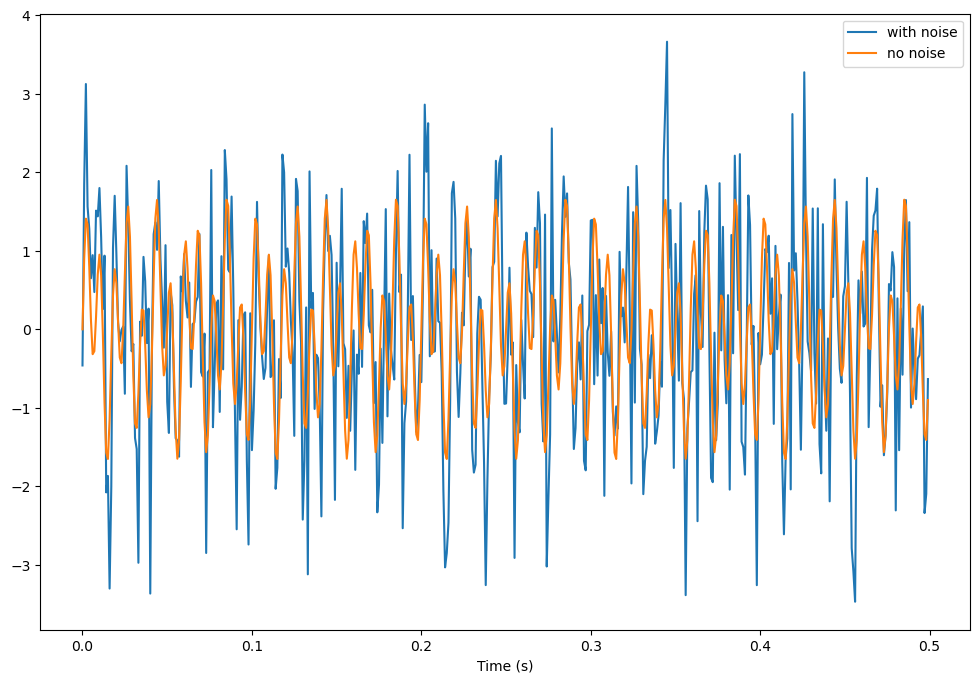

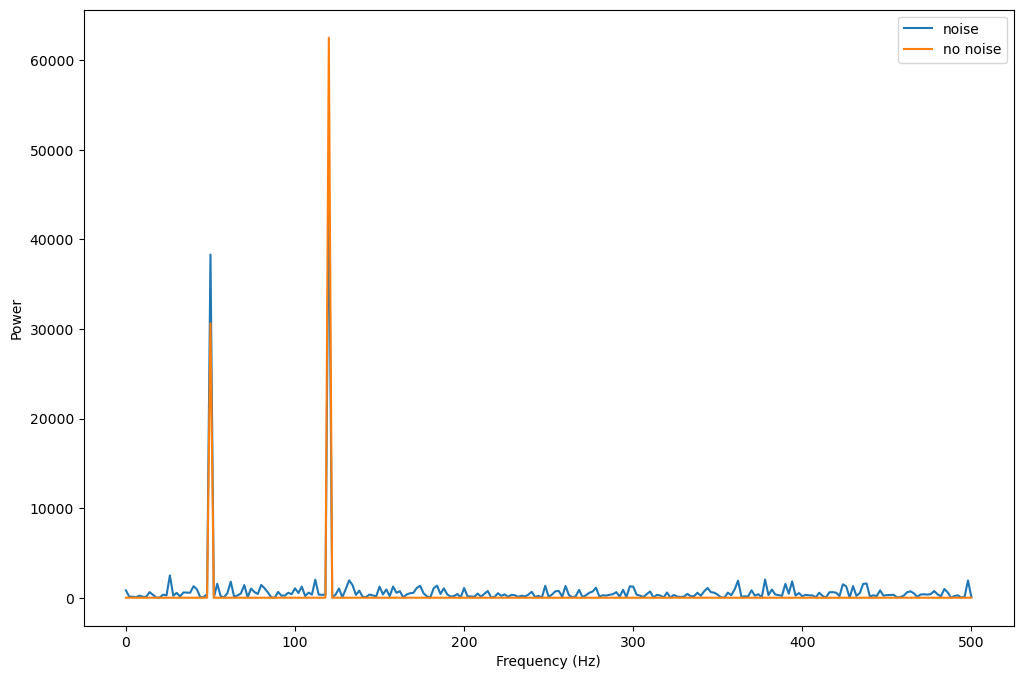

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# create a signal

Fs = 1000.  # sampling frequency (in Hz)  # sampling interval
dt = 1/Fs   # sampling interval
N = 500     # number of samples

# create a signal
t = np.arange(0,N)*dt   # create a time array of length N
y = 0.7*np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)

# add some noise
ynoise = y + np.random.normal(0,1,np.size(t))

plt.figure(figsize=[12,8])
plt.plot(t,ynoise,label='with noise')
plt.plot(t,y, label='no noise')
plt.legend()
plt.xlabel('Time (s)')
plt.show()

# calculate the Fourier transform for noisy and noise free data

Y = np.fft.rfft(y)
Ynoise = np.fft.rfft(ynoise)

# calculate the frequency vector
f = np.arange(0,N/2+1)*Fs/N

plt.figure(figsize=[12,8])
plt.plot(f,np.abs(Ynoise)**2, label='noise')
plt.plot(f,np.abs(Y)**2, label = 'no noise')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.show()